# Code to cleanup data collected from Giantbomb

In [26]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import scipy as scipy
import time
plt.style.use('seaborn-whitegrid')
get_ipython().magic('matplotlib inline')

In [27]:
df = pd.read_csv('twitch_games.csv')

In [132]:
giantbomb_ids = list(df[df['rank']<15]['giantbomb_id'].unique())

In [161]:
gb_df = pd.DataFrame(columns = ["id","gb_name","gb_genre","gb_deck","gb_developers","gb_image","gb_release_date","gb_publisher"])

In [163]:
rowcount = 0
for gbid in giantbomb_ids:
    if gbid ==0:
        continue
    f = open('giantbomb/' + str(gbid) + '.txt')
    soup = BeautifulSoup(f.read(), 'html.parser')
    try:
        name = soup.find_all("name")[0].text
    except:
        name = ""
    try:
        genre = soup.find_all("genre")[0].find_all("site_detail_url")[0].text[42:soup.find_all("genre")[0].find_all("site_detail_url")[0].text.find('&')]
    except:
        genre = 'Other'
    try:
        deck = soup.find_all("deck")[0].text
    except:
        deck = ""
    try:
        developers = soup.find_all("developers")[0].company.find_all("name")[0].text
    except:
        developers = ""
    try:
        image = soup.find_all("image")[0].small_url.text
    except:
        image = ""
    try:
        release_date = soup.find_all("original_release_date")[0].text
    except:
        release_date = ""
    try:
        publisher = soup.find_all("publishers")[0].find_all("publisher")[0].find_all("name")[0].text
    except:
        publisher = ""
    gb_df.loc[rowcount] = [gbid, name, genre, deck, developers, image, release_date, publisher]
    rowcount=rowcount + 1
    f.close()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ed5c890>], dtype=object)

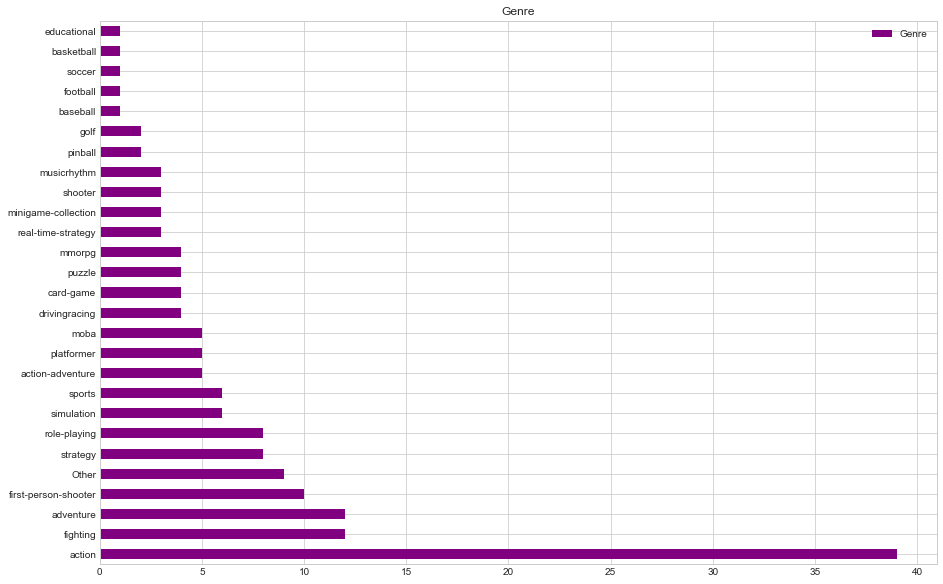

In [164]:
gb_genres = gb_df[["gb_genre"]].apply(pd.value_counts)
gb_genres.columns=["Genre"]
gb_genres.plot(kind='barh', subplots=True, figsize=(15,10), color="purple")

## Fetch Images for game_titles

In [168]:
headers = r.utils.default_headers()

# Update the headers with your custom ones
# You don't have to worry about case-sensitivity with
# the dictionary keys, because default_headers uses a custom
# CaseInsensitiveDict implementation within requests' source code.
headers.update(
    {
        'User-Agent': 'Shashank-UserAgent-1.0'
    }
)

import shutil

import time
        
ar = gb_df["id"].values
count = 0 
for ele in gb_df["gb_image"]:
    if len(ele) == 0:
        continue
    rr = r.get(ele, stream=True, headers=headers)
    if rr.status_code == 200:
        with open('images/' + str(int(ar[count])) + '.png', 'wb') as f:
            rr.raw.decode_content = True
            shutil.copyfileobj(rr.raw, f)
    count = count +1
    time.sleep(2)